In [2]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras

%matplotlib inline

In [3]:
from keras import backend as K

def l2_loss(y_pred,y_true):
    return K.sum((K.square(y_true - y_pred)))

In [4]:
import os
print(os.getcwd())


/home/shreyas/BE PROJECT


In [5]:
import numpy as np
import glob
Y_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("/home/shreyas/BE PROJECT/nusta_noise10/*.nii")
i = 0
z=0
for f_name in txt_files:
    z=z+1
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        Y_train[i] = b
        i = i + 1

In [6]:
i

42

In [7]:
Y_train = Y_train[:42,:,:]
Y_train.shape

(42, 3, 256, 150)

In [8]:
import os
os.chdir('/home/shreyas/BE PROJECT/image_with_noise10')

In [9]:
import numpy as np
import glob
X_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("/home/shreyas/BE PROJECT/image_with_noise10/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        X_train[i] = b
        i = i + 1     

In [10]:
print(i)
X_train = X_train[:42,:,:]
X_train.shape

42


(42, 3, 256, 150)

In [11]:
import os
os.chdir('/home/shreyas/BE PROJECT/')

In [12]:
from keras.models import load_model
import tensorflow as tf
model = tf.keras.models.load_model('model_with_noise_10.h5',custom_objects={'l2_loss':l2_loss})

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 3, 256, 150, 64)   1792      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 256, 150, 64)   2

In [14]:
#PSNR CALCULATION

import numpy as np
from math import log10, sqrt 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    #print("mse:",mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.Therefore PSNR have no importance. 
                  
        return 100
    psnr_noisy = 20 * log10(255.0 / sqrt(mse)) 
    #print('PSNR of reconstructed validation images: {psnr}dB'.format(psnr=np.round(psnr_noisy,2)))
    return np.round(psnr_noisy,2)

In [15]:
test_img = X_train - Y_train
test_img.shape

(42, 3, 256, 150)

In [16]:
PSNR(test_img[12],X_train[12])
resi = model.predict(np.array(X_train[12]).reshape(-1,3,256,150,1))
print(resi.shape)
resi = resi.reshape(3,256,150)
PSNR(X_train[12]-resi,X_train[12])

(1, 3, 256, 150, 1)


65.96

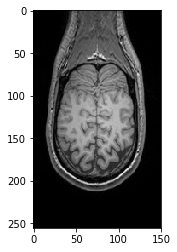

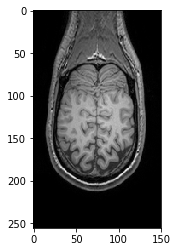

In [17]:
slice_A = X_train[12][1]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
#plt.savefig('noisy_img(1).png',bbox_inches='tight')
plt.show()

B = X_train[12]-resi
slice_B = B[1]
fig, ax = plt.subplots()
ax.imshow(slice_B, cmap="gray")
#plt.savefig('noise_free(1).png',bbox_inches='tight')
plt.show()


In [18]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(30,35):
    nins = PSNR(test_img[i],X_train[i])
    resi = model.predict(np.array(X_train[i]).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(X_train[i]-resi,X_train[i])
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [19]:
noise_inserted

[66.98, 66.97, 67.0, 67.57, 67.02]

In [20]:
noise_removed

[67.86, 67.55, 68.35, 66.45, 73.5]

In [21]:
slice_A = test_img[35:40]

In [22]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [23]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(5):
    rr = add_rician_noise_to_img(0.2,slice_A[i])
    nins = PSNR(slice_A[i],rr)
    resi = model.predict(np.array(rr).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(rr-resi,rr)
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [24]:
noise_inserted# 20

[60.4, 61.4, 60.34, 60.47, 60.62]

In [29]:
noise_removed# 20

[67.21, 68.61, 69.46, 68.14, 73.39]

In [30]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(5):
    rr = add_rician_noise_to_img(0.1,slice_A[i])
    nins = PSNR(slice_A[i],rr)
    resi = model.predict(np.array(rr).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(rr-resi,rr)
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [31]:
noise_inserted

[64.9, 66.61, 64.8, 65.0, 65.25]

In [32]:
noise_removed

[67.21, 68.61, 69.46, 68.14, 73.39]